In [1]:
!pip install ucimlrepo


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


Importing the Necessary Libraries

In [2]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

/Users/budagamdevichand/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Fetching the database

In [3]:
# fetch dataset
spambase = fetch_ucirepo(id=94)
# data (as pandas dataframes)
X = spambase.data.features
y = spambase.data.targets
# metadata
print(spambase.metadata)
# variable information
print(spambase.variables)


{'uci_id': 94, 'name': 'Spambase', 'repository_url': 'https://archive.ics.uci.edu/dataset/94/spambase', 'data_url': 'https://archive.ics.uci.edu/static/public/94/data.csv', 'abstract': 'Classifying Email as Spam or Non-Spam', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 4601, 'num_features': 57, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1999, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C53G6X', 'creators': ['Mark Hopkins', 'Erik Reeber', 'George Forman', 'Jaap Suermondt'], 'intro_paper': None, 'additional_info': {'summary': 'The "spam" concept is diverse: advertisements for products/web sites, make money fast schemes, chain letters, pornography...\n\nThe classification task for this dataset is to determine whether a given email is spam or not.\n\t\nOur collecti

Splitting the dataset

In [4]:
minimum_value = np.min(X)
maximum_value = np.max(X)

# Normalize the array to the [0, 1] range
x = (X - minimum_value) / (maximum_value - minimum_value)

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)
# print(x_train)

/Users/budagamdevichand/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/Users/budagamdevichand/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


Part-A

Inilaising the SVM model and fitting the data

In [5]:
model=SVC(C=1,kernel='linear')
y_train=y_train.values.ravel()
print(y_train.shape)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
accuracy_test=model.score(x_test,y_test)
accuracy_train=model.score(x_train,y_train)
print(accuracy_train)
print(accuracy_test)


(3680,)
0.9013586956521739
0.8957654723127035


Implementation of functions for evaluation

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# calculate accuracy
acc = accuracy_score(y_test, y_pred)

# Calculate precision
p = precision_score(y_test, y_pred)

# Calculate recall
r = recall_score(y_test, y_pred)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {acc}")
print(f"Precision: {p}")
print(f"Recall: {r}")
print(f"F1 Score: {f1}")

Accuracy: 0.8957654723127035
Precision: 0.9323529411764706
Recall: 0.8128205128205128
F1 Score: 0.8684931506849315


Varying the regularisation parameters and evaluating the SVM model

In [23]:

c = [0.001, 0.1, 1, 10, 100]
accuracies = np.array([])
precisions = np.array([])
recalls = np.array([])
f1_scores = np.array([])

for i in c:
    model = SVC(C=i, kernel='linear')
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=True)
    recall = recall_score(y_test, y_pred, zero_division=True)
    f1 = f1_score(y_test, y_pred, zero_division=True)
    
    accuracies = np.append(accuracies, accuracy)
    precisions = np.append(precisions, precision)
    recalls = np.append(recalls, recall)
    f1_scores = np.append(f1_scores, f1)

    print(f"C = {i}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")




C = 0.001
Accuracy: 0.5765472312703583
Precision: 1.0
Recall: 0.0
F1 Score: 0.0
C = 0.1
Accuracy: 0.8425624321389794
Precision: 0.9069767441860465
Recall: 0.7
F1 Score: 0.7901591895803183
C = 1
Accuracy: 0.8957654723127035
Precision: 0.9323529411764706
Recall: 0.8128205128205128
F1 Score: 0.8684931506849315
C = 10
Accuracy: 0.9174809989142236
Precision: 0.9337016574585635
Recall: 0.8666666666666667
F1 Score: 0.898936170212766
C = 100
Accuracy: 0.9250814332247557
Precision: 0.9349593495934959
Recall: 0.8846153846153846
F1 Score: 0.909090909090909


Plotting the results for comparison

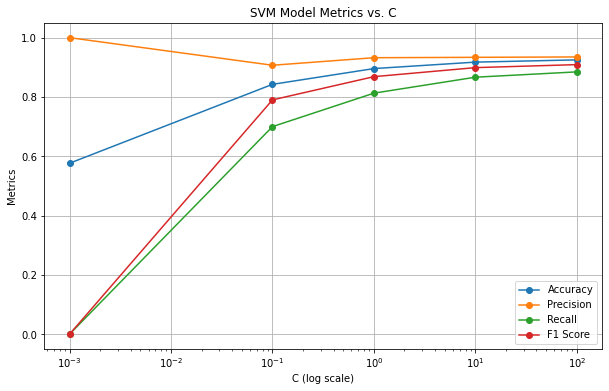

In [24]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(c, accuracies, marker='o', label='Accuracy')
plt.plot(c, precisions, marker='o', label='Precision')
plt.plot(c, recalls, marker='o', label='Recall')
plt.plot(c, f1_scores, marker='o', label='F1 Score')

plt.xscale('log')
plt.xlabel('C (log scale)')
plt.ylabel('Metrics')
plt.title('SVM Model Metrics vs. C')
plt.legend()
plt.grid(True)                             
plt.show()

Part-B

Initialising various instances of SVM's with different kernels

In [17]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize empty arrays to store metrics
accuracy = []
precision = []
recall = []
f1_scores = []

# Polynomial degree 2
model = SVC(kernel='poly', degree=2)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy.append(accuracy_score(y_test, y_pred))
precision.append(precision_score(y_test, y_pred))
recall.append(recall_score(y_test, y_pred))
f1_scores.append(f1_score(y_test, y_pred))

# Polynomial degree 3
model = SVC(kernel='poly', degree=3)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy.append(accuracy_score(y_test, y_pred))
precision.append(precision_score(y_test, y_pred))
recall.append(recall_score(y_test, y_pred))
f1_scores.append(f1_score(y_test, y_pred))

# Sigmoid
model = SVC(kernel='sigmoid')
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy.append(accuracy_score(y_test, y_pred))
precision.append(precision_score(y_test, y_pred))
recall.append(recall_score(y_test, y_pred))
f1_scores.append(f1_score(y_test, y_pred))

# RBF
model = SVC(kernel='rbf')
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy.append(accuracy_score(y_test, y_pred))
precision.append(precision_score(y_test, y_pred))
recall.append(recall_score(y_test, y_pred))
f1_scores.append(f1_score(y_test, y_pred))

# Create a DataFrame
df = pd.DataFrame({
    'accuracy': accuracy,
    'precision': precision,
    'recall': recall,
    'F1_score': f1_scores
}, index=['poly degree-2', 'poly degree-3', 'sigmoid', 'rbf'])

print(df)


               accuracy  precision    recall  F1_score
poly degree-2  0.885993   0.964169  0.758974  0.849354
poly degree-3  0.840391   0.951673  0.656410  0.776935
sigmoid        0.803474   0.777188  0.751282  0.764016
rbf            0.932682   0.953039  0.884615  0.917553


Part-C

Varying the degree of polynomial and regularisation parameter 

In [18]:
degree = [1, 1, 3, 3]
c = [0.01, 100, 0.01, 100]
train_accuracy = np.array([])
test_accuracy = np.array([])

for i in range(4):
    model = SVC(kernel='poly', degree=degree[i], C=c[i])
    model.fit(x_train, y_train)
    train_acc = model.score(x_train, y_train)
    test_acc = model.score(x_test, y_test)
    train_accuracy = np.append(train_accuracy, train_acc)
    test_accuracy = np.append(test_accuracy, test_acc)

# Create the DataFrame
df = pd.DataFrame({'polynomial degree': degree, 'C': c, 'train accuracy': train_accuracy, 'test accuracy': test_accuracy})
print(df)

   polynomial degree       C  train accuracy  test accuracy
0                  1    0.01        0.823098       0.812161
1                  1  100.00        0.935870       0.923996
2                  3    0.01        0.705163       0.674267
3                  3  100.00        0.961413       0.914224


Plotting the results

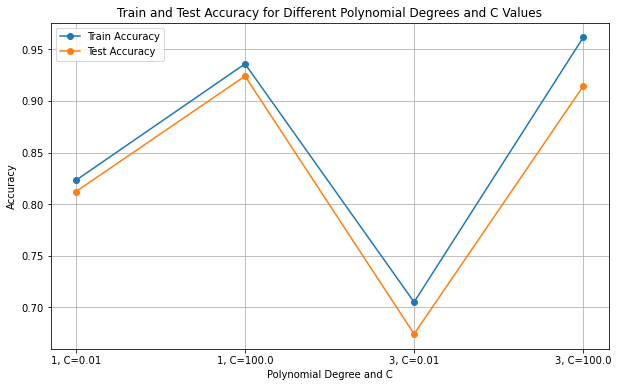

In [19]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['train accuracy'], marker='o', label='Train Accuracy')
plt.plot(df.index, df['test accuracy'], marker='o', label='Test Accuracy')
plt.xticks(df.index, df['polynomial degree'].astype(str) + ', C=' + df['C'].astype(str))
plt.xlabel('Polynomial Degree and C')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy for Different Polynomial Degrees and C Values')
plt.legend()
plt.grid(True)
plt.show()

**Analysing the training and testing accuracies in 4 cases :**  
*1 - underfit  ( both training and testing accuracies are low and there is a significant gap between them)*  
*2 - optimal  (training and testing accuracies are both high)*  
*3 - underfit  ( both training and testing accuracies are low and there is a significant gap between them)*  
*4 - overfit  (train accuracy is high and test accuracy is low )*